# APS Failure at Scania Trucks
BY Sahil Josan

![](https://i.imgur.com/C0qDsRI.jpg)

Dataset  https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

#### Task performed:
1. Import Data
2. Combine Train and Test Data
3. EDA (Exploratory Data Analysis)
	- Replace any special character with np.NAN
	- Change datatype of all features
	- Handle Null Values
	- Graphical analysis
	- Univariate Analysis	
	- Handle the outliers
	- Check Correlation
4. Seperate Independent and Dependent Features
5. Handle the inbalance data by under_sampling
6. Feature Scalling using Standard Scaler
7. Model Training using:
	- Logistic Regression
	- Support Vector Classifier
	- Decision Tree Classifier
	- Random Forest classifier
	- Bagging classifier
	- Extra Tree classifier
	- AdaBoost Classifier
	- Gradient Boost Classifier
	- XG Boost Classifier
8. Check for all models:
	- Accuracy
	- Precision
	- Recall
	- Roc_Auc_Score
9. Plot ROC (Receiver Operating Characteristic) Curve for all models
10. Hyper-Parameter Tunning of all models using GridSearchCV

### Import required libraries

In [69]:
## pamdas and numpy
import pandas as pd
import numpy as np

## For visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## For Q-Q Plot
import scipy.stats as stats

## For model building, Machine learning libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# To Hanldle inbalance data using under_sampling
from imblearn.under_sampling import NearMiss


## To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### Import Data

In [2]:
train_data = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Dataset\aps_failure_training_set.csv")
train_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,1209600,30

In [3]:
test_data = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Dataset\aps_failure_test_set.csv")
test_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,38710

In [4]:
train_data.shape,test_data.shapea

((60000, 171), (16000, 171))

### Combine Train and Test data 

In [5]:
df = pd.concat([train_data,test_data])
df.reset_index(inplace = True)
df.drop(columns=['index'],inplace=True)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,1209600,30

In [6]:
df.shape

(76000, 171)

### Check any special characters

In [7]:
df[df['ab_000'] == 'na']

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,819596,584074,0,1644,362,562,842,30194,3911734,1606,0,0,0,1348578,1035668,338762,236540,182278,151778,163248,470800,19292,0,4289260,448,556,642,2,1974038

### Replace na with nan

In [8]:
df = df.replace('na',np.nan)

#### Change datatype of all features

In [9]:
for fea in [feature for feature in df.columns if feature not in ['class','aa_000']]:
    try:
        df[fea] = df[fea].astype(int64)
    except:
        df[fea] = df[fea].astype(float)

In [10]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [11]:
round((df.describe().T),1)

,count,mean,std,min,25%,50%,75%,max
aa_000,76000.0,61159.8,264736.6,0.0,860.0,30813.0,48840.0,4.294967e+07
ab_000,17308.0,0.7,3.3,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,71739.0,356439779.9,795252963.8,0.0,16.0,154.0,970.0,2.130707e+09
ad_000,57158.0,150630.0,35905934.9,0.0,24.0,128.0,430.0,8.584298e+09
ae_000,72810.0,6.7,153.4,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,75137.0,347561.1,1707592.9,0.0,112.0,41260.0,168046.0,1.195801e+08
ee_008,75137.0,139896.8,469232.7,0.0,0.0,3862.0,139500.0,1.926740e+07
ee_009,75137.0,8425.0,48754.4,0.0,0.0,0.0,2000.0,4.570398e+06
ef_000,72514.0,0.1,4.2,0.0,0.0,0.0,0.0,4.820000e+02


#### Check duplicated entries

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 99.2+ MB


### Chech the null values

In [14]:
# First 20 features with highest null values
null_20 = df.isna().sum().sort_values(ascending=False)[:20]
null_20

br_000    62393
bq_000    61703
bp_000    60461
bo_000    58709
cr_000    58692
ab_000    58692
bn_000    55722
bm_000    50095
bl_000    34503
bk_000    29128
cg_000    18842
co_000    18842
ad_000    18842
ch_000    18842
cf_000    18842
da_000    17526
dc_000    17526
db_000    17526
cu_000    17526
cz_000    17526
dtype: int64

### How many Features having null values

In [15]:
df.isna().sum()[df.isna().sum() != 0]

ab_000    58692
ac_000     4261
ad_000    18842
ae_000     3190
af_000     3190
          ...  
ee_007      863
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
Length: 169, dtype: int64

### Observation :
Out of 171 features 169 features are having null values

#### Plotting Top 20 Features having null values

<function matplotlib.pyplot.show(close=None, block=None)>

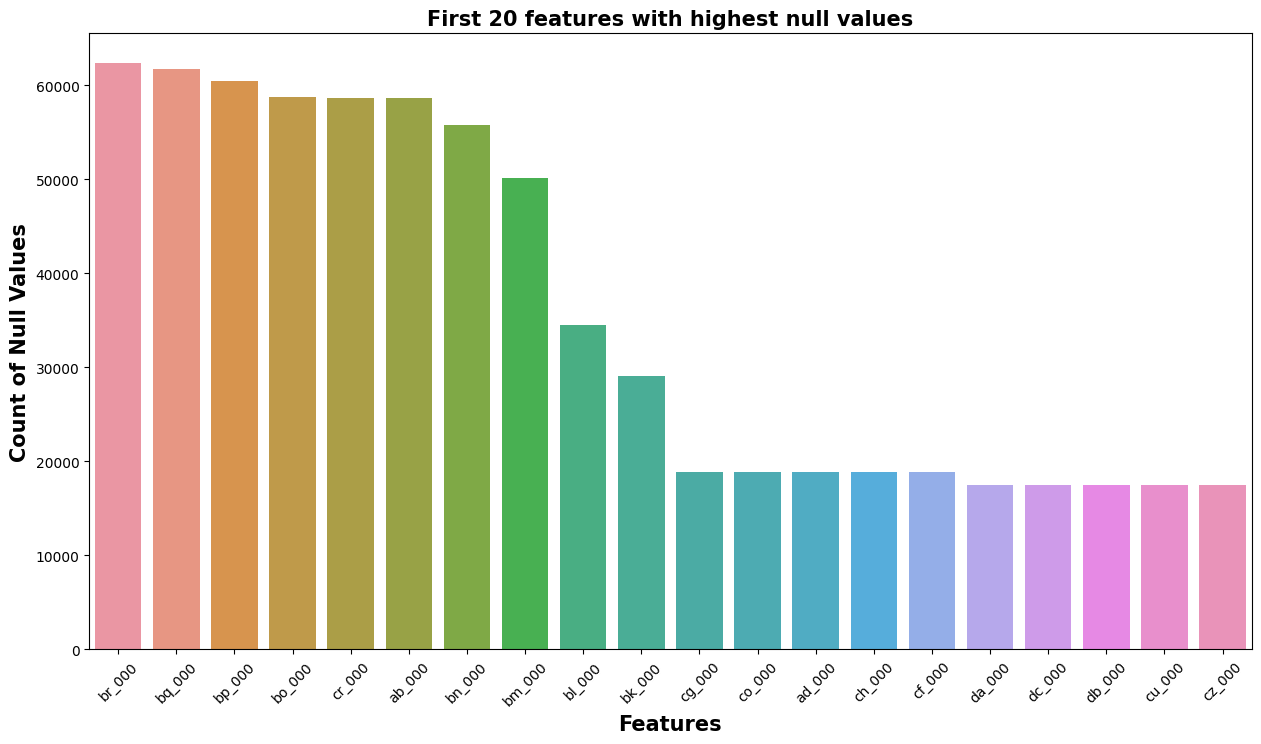

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(y = null_20, x = null_20.index)
plt.xticks(rotation= 45)
plt.xlabel("Features", fontsize = 15, fontweight = 'bold')
plt.ylabel("Count of Null Values", fontsize = 15, fontweight = 'bold')
plt.title("First 20 features with highest null values", fontsize = 15, fontweight = "bold",y = 1)
plt.show

#### Handle the null values of all features

In [16]:
for fea in [feature for feature in df.columns if feature not in ['class','aa_000']]:
    df[fea] = df[fea].fillna(df[fea].median())

#### Chech the null values 

In [17]:
df.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

#### Extract Numerical features

In [18]:
num_feature = [feature for feature in df.columns if feature not in ['class']]

#### Univariate Analysis

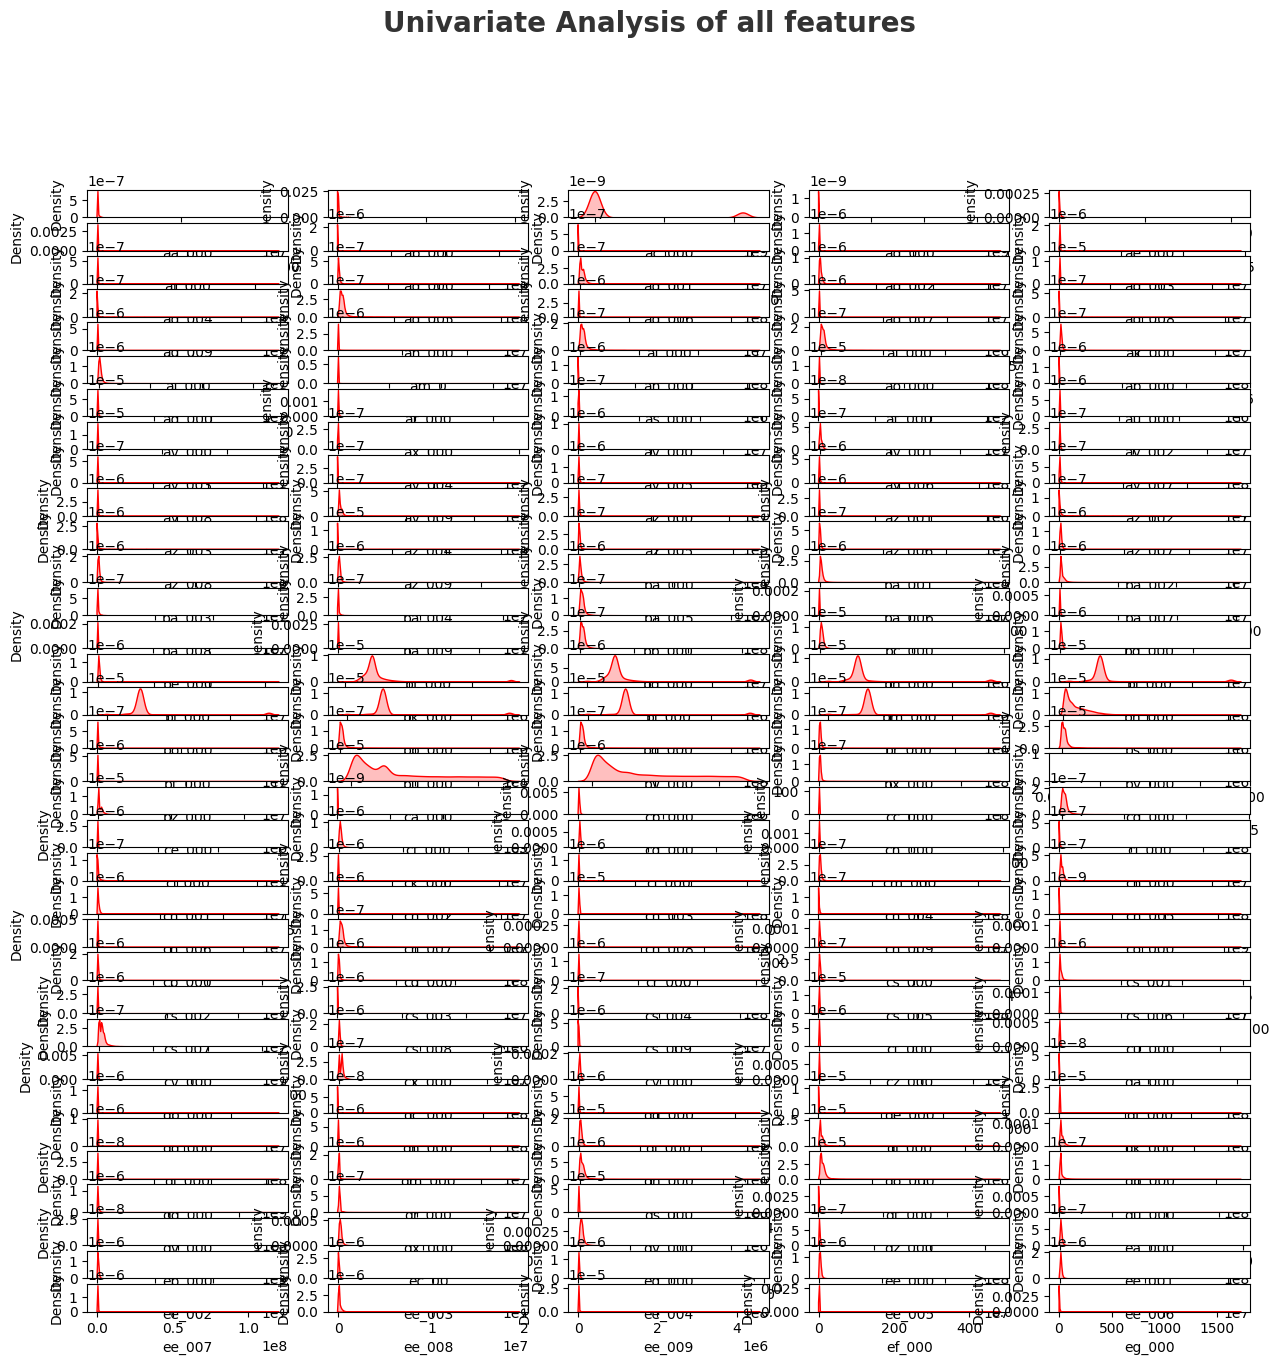

In [30]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(num_feature)):
    plt.subplot(35,5,i+1)
    sns.kdeplot(df[num_feature[i]], shade =True, color='r')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

#### Check the outliers

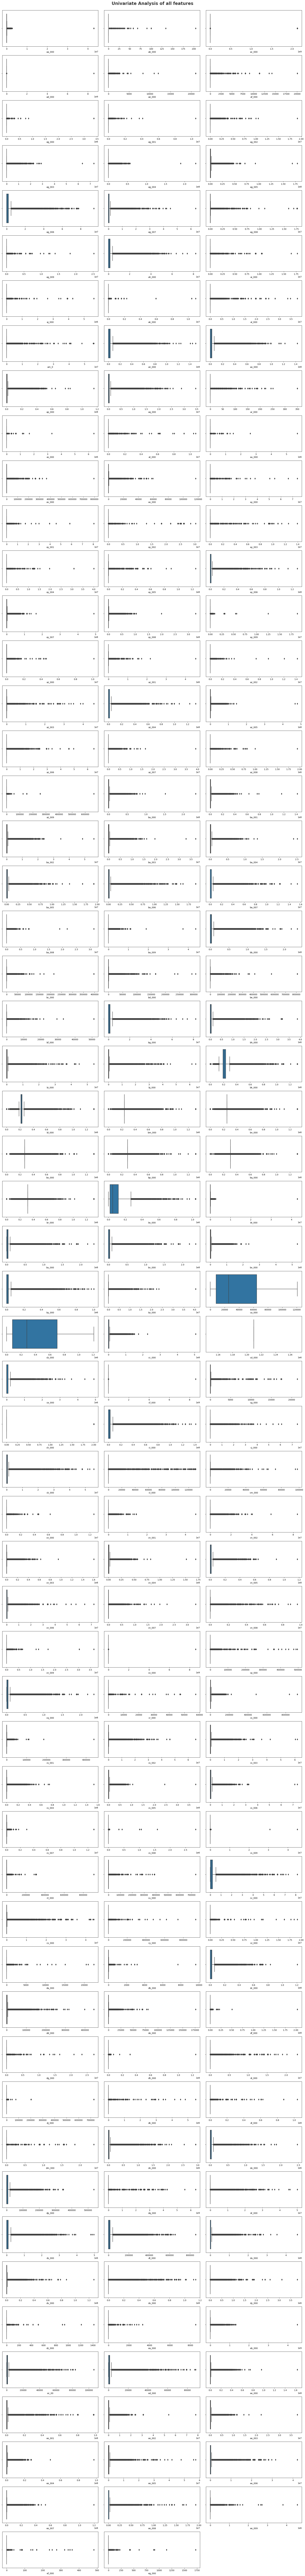

In [38]:
plt.figure(figsize = (20,250))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(num_feature)):
    plt.subplot(85,3,i+1)
    sns.boxplot(data = df, x = num_feature[i])
    plt.xlabel(num_feature[i])
    plt.tight_layout()

#### Handling the outliers

In [19]:
df1 = df.copy()

In [31]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [32]:
for feature in num_feature:
    df1=remove_outliers(df1, feature)

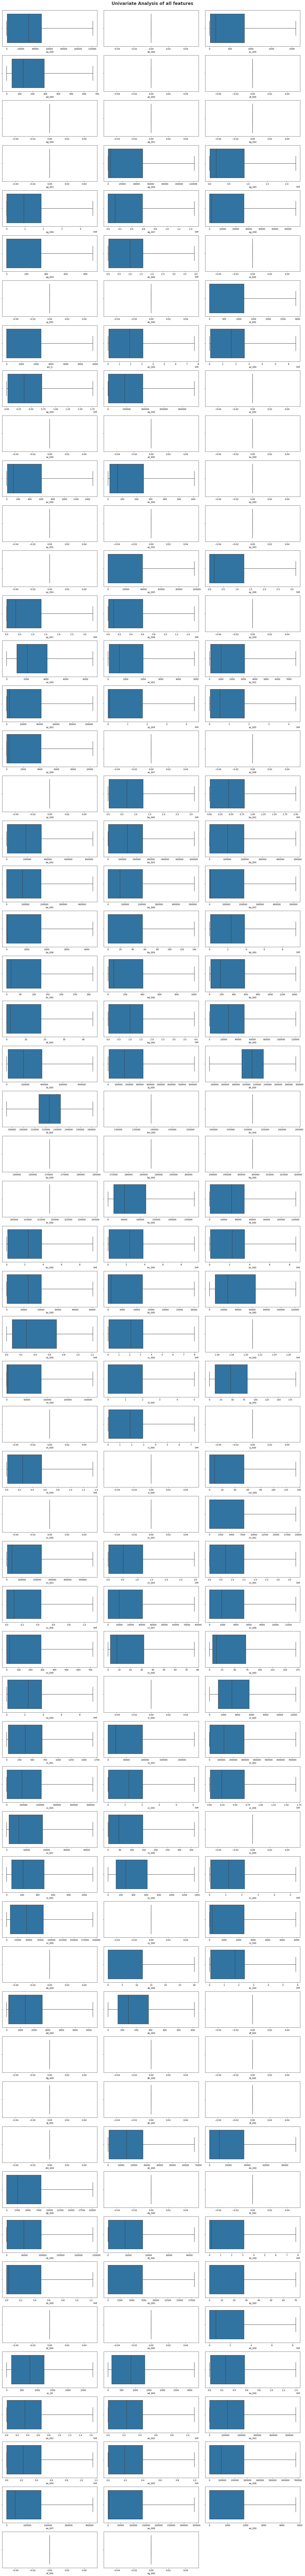

In [42]:
plt.figure(figsize = (20,250))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(num_feature)):
    plt.subplot(85,3,i+1)
    sns.boxplot(data = df1, x = num_feature[i])
    plt.xlabel(num_feature[i])
    plt.tight_layout()

#### Correlation

In [20]:
df1.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.009953,-0.037851,-0.000801,0.023778,0.033524,0.011686,0.076387,0.195179,0.307466,0.357462,0.445810,0.379355,0.271186,0.123709,0.044702,0.501268,0.074545,0.034418,0.014449,0.273446,0.275844,0.504696,0.508111,0.450581,0.429706,0.081435,0.030778,0.037517,0.017749,0.070820,0.105638,0.028237,0.016638,0.055824,0.063955,0.087628,0.147315,0.266297,0.386731,0.338111,0.009989,0.173111,0.221727,0.145644,0.104900,0.379526,0.411568,0.094309,0.100117,0.036804,0.009391,0.385399,0.457381,0.469458,0.480540,0.471362,0.436573,0.390582,0.356156,0.270114,0.221638,0.504151,0.158271,0.175990,0.156868,0.148939,0.500688,0.461305,0.441869,0.405140,0.022370,0.004197,-0.006565,-0.012725,-0.019079,-0.026105,-0.032337,-0.036901,0.154688,0.999668,0.502662,0.502662,0.476160,0.494055,0.166321,0.057715,0.111601,0.475722,NaN,0.187082,-0.000801,0.111283,0.004262,0.548582,0.182907,0.415642,0.090239,0.266375,0.087791,0.221389,0.330139,0.410708,0.450687,0.379165,0.236095,0.193262,0.164966,0.098447,-0.000798,0.072163,0.502662,0.039457,0.350963,0.306554,0.319625,0.340633,0.400323,0.459321,0.257792,0.087319,0.011189,0.012165,0.030500,0.074724,0.261147,0.232702,0.023433,0.038540,0.005352,0.009837,0.268415,0.248261,0.133399,0.012164,0.028709,0.004588,0.064304,-0.001283,0.014933,-0.001477,-0.001835,0.430208,0.258254,0.257813,0.101842,0.201636,0.313571,0.310542,0.165475,0.192785,0.209667,0.141963,0.007819,0.009113,0.175503,0.329742,0.347471,0.348363,0.312457,0.414098,0.419884,0.409628,0.419753,0.425622,0.356954,0.259626,0.133790,0.005648,0.009239
ab_000,0.009953,1.000000,-0.002489,-0.000372,0.034129,0.053156,-0.000206,0.006841,0.024010,0.037640,0.039989,0.018278,-0.022941,-0.023762,-0.002980,0.003805,0.026811,-0.003383,-0.001804,-0.001176,0.037701,0.037188,0.026006,0.029975,0.034278,0.011783,0.064956,-0.000484,0.008036,0.022025,0.001964,0.037002,-0.002481,-0.002061,-0.002647,-0.003580,-0.003008,-0.008172,-0.029159,0.011211,0.029664,0.001531,0.019839,0.010998,0.004148,-0.007888,-0.027875,0.014609,0.080701,0.083893,0.035462,-0.000768,0.014921,0.004274,0.004248,0.000688,-0.003484,-0.010493,-0.016383,-0.017264,0.008538,0.064538,0.030270,0.041605,0.043339,0.048309,-0.007988,0.026836,0.019984,0.052784,0.015450,0.004479,-0.003878,-0.006681,-0.007879,-0.009705,-0.009140,-0.009768,-0.009624,0.017648,0.009988,0.030495,0.030495,0.025175,0.005791,-0.012601,-0.017337,-0.015730,0.019312,NaN,0.028806,-0.000372,0.013334,0.001158,0.017359,0.043816,0.021733,-0.000136,0.069220,0.026342,0.016494,0.018550,0.006095,-0.001310,-0.010968,0.015583,0.069470,0.075151,0.027496,-0.000373,0.008046,0.030495,0.037657,0.026518,0.002245,0.010515,0.015683,-0.003042,0.004992,0.015021,0.004190,-0.000962,-0.000523,-0.003239,0.002309,0.006888,0.025518,0.008746,-0.002213,-0.001079,-0.016540,0.004797,0.029156,0.074363,0.000014,0.0

#### Replace class values with 0 and 1 

In [21]:
df1 = df1.replace({
                    'neg' : 0,
                    "pos" : 1
                    })

#### Seperate Independent and  dependent features

In [22]:
x = df1.drop('class',axis = 1)
y = df1['class']

In [23]:
x.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,287520.0,303960.0,318120.0,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,0.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,128.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,251400.0,270300.0,287520.0,303960.0,318120.0,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,2.0,46.0,0.0,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,8.0,0.0,3646660.0,0.0,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,212.0,280.0,1186436.0,44669.0,0.0,204.0,0.0,0.0,1743089.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,123

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

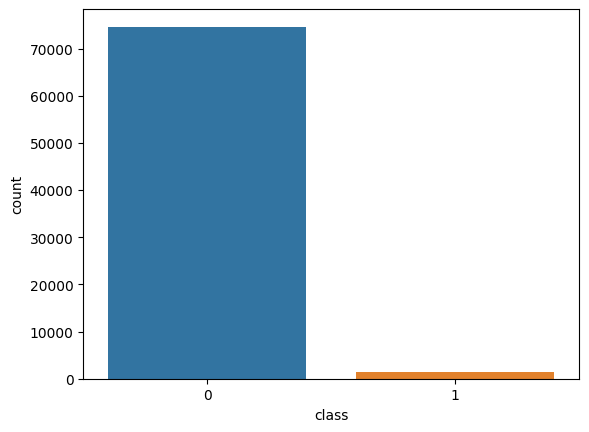

In [67]:
sns.countplot(data = df1, x =y)

In [68]:
y.value_counts()

0    74625
1     1375
Name: class, dtype: int64

### Handle the inbalance data

In [71]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_imb,y_imb= nm.fit_resample(x,y)

In [72]:
from collections import Counter
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_imb)))

Original dataset shape Counter({0: 74625, 1: 1375})
Resampled dataset shape Counter({0: 1375, 1: 1375})


#### Split Data into training and test dataset

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x_imb,y_imb,test_size=0.33,random_state=42)

In [74]:
x_train.shape,y_train.shape

((1842, 170), (1842,))

In [75]:
x_test.shape,y_test.shape

((908, 170), (908,))

In [76]:
y_train.value_counts()

1    921
0    921
Name: class, dtype: int64

In [77]:
y_test.value_counts()

1    454
0    454
Name: class, dtype: int64

#### Standard Scaler

In [30]:
scaler = StandardScaler()
scaler

StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)

In [32]:
x_test = scaler.transform(x_test)

In [33]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,-0.102993,-0.099203,2.304468,-0.004370,-0.05502,-0.058328,-0.017921,-0.032136,-0.060556,-0.117125,-0.152724,0.327396,0.012895,-0.080596,-0.136062,-0.033298,0.016002,-0.030296,-0.023602,-0.011304,-0.105582,-0.105903,0.022271,-0.061043,0.069417,0.179052,-0.087389,-0.008139,0.117753,-0.011802,2.421785,0.240620,-0.023541,-0.02134,-0.02482,-0.034026,-0.028572,-0.077614,0.319399,0.131266,-0.258371,-0.012841,0.048991,-0.092463,-0.044700,-0.036658,0.314704,-0.102961,-0.109601,-0.062487,-0.043378,-0.010313,0.120027,0.049329,-0.057521,-0.034152,-0.003867,-0.034747,-0.013565,0.210383,-0.128340,-0.105075,0.030369,-0.136329,-0.158642,-0.114697,-0.127440,0.016134,0.100038,-0.007006,0.119485,0.260685,0.203978,-0.054314,-0.106276,-0.214553,-0.209382,-0.203861,-0.200448,-0.828493,-0.103076,0.031661,0.031661,0.071681,0.023478,-0.155190,1.635893,-0.995885,0.063242,0.0,0.869065,-0.004433,0.399507,-0.014015,0.005210,-0.090712,0.033179,-0.068347,0.412591,-0.042127,-0.090989,-0.150695,-0.206454,-0.005486,0.224672,0.312404,0.111277,0.026976,-0.028768,-0.004434,-0.052514,0.031661,-0.018738,2.060475,1.582339,0.026825,0.162138,-0.030702,0.003625,0.257447,0.039455,-0.009038,-0.006262,1.179481,0.058891,0.533366,-0.171862,-0.003556,0.533443,-0.030731,0.298950,0.430170,1.057597,0.840935,-0.018668,-0.026834,-0.013152,-0.082733,-0.010701,-0.025559,-0.024739,-0.02795,0.259462,-0.064552,-0.093295,-0.045356,-0.143037,-0.042825,-0.146672,0.771801,0.338832,-0.183757,-0.122712,-0.01814,-0.026949,-0.218499,1.805844,2.360529,0.044932,0.676579,-0.004870,0.066258,-0.173992,-0.349760,-0.307522,-0.195590,-0.299630,-0.178233,-0.021393,-0.025204
1,0.115909,-0.099203,2.304468,-0.004411,-0.05502,-0.058328,-0.017921,-0.032136,-0.060556,-0.117000,0.075019,1.049729,0.150801,-0.164833,-0.123978,-0.032058,0.299498,-0.051656,-0.023602,-0.011304,-0.096694,-0.098205,0.454252,0.460497,0.092792,0.175560,-0.087389,-0.008139,-0.042041,-0.011802,1.547641,1.982594,-0.023541,-0.02134,-0.02482,-0.034026,-0.028572,-0.078195,-0.301133,-0.241528,1.537666,-0.012841,-0.020543,-0.098294,-0.060770,-0.105834,0.444470,0.338242,-0.110435,-0.062487,-0.043378,-0.010313,0.247760,0.600279,0.768308,0.575026,0.219397,-0.006431,-0.094533,0.229236,-0.091693,-0.105058,0.343856,3.897289,2.803350,0.559503,-0.127440,0.299963,0.227656,0.112137,0.065822,-0.220009,-0.437436,-0.487723,-0.536929,-0.423171,-0.570918,-0.203861,-0.200448,1.075378,0.115862,0.346071,0.346071,0.423857,0.322793,-0.134460,1.768637,1.958259,0.417715,0.0,1.510181,-0.004433,0.176780,-0.014015,0.372050,-0.062123,0.156344,-0.068347,0.828286,-0.042127,-0.090989,-0.046476,0.900566,0.734569,-0.071969,-0.201269,-0.073506,-0.073620,-0.033780,-0.004420,0.067316,0.346071,-0.018738,0.937682,0.641820,0.461290,0.105639,-0.047275,0.574028,0.005362,-0.096784,-0.014176,-0.006262,0.274293,1.909383,1.488050,0.956194,-0.028469,-0.009669,0.800350,0.177158,1.279371,0.484648,0.106029,-0.018668,-0.026834,0.009335,0.004864,-0.010701,-0.025559,-0.024739,-0.02795,0.157492,0.056862,0.213997,-0.045356,-0.143037,0.683082,0.754756,2.632644,1.387145,-0.183757,-0.122712,-0.01814,-0.026949,-0.220382,0.913986,1.028804,0.194880,0.509742,0.500858,0.282273,0.757498,1.010787,-0.214544,-0.173912,-0.294425,-0.177278,-0.021393,-0.025204
2,-0.198509,-0.099203,-0.433940,-0.004441,-0.05502,-0.058328,-0.017921,-0.032136,-0.060556,-0.117125,-0.181909,-0.317419,-0.418787,-0.342326,-0.149881,-0.033298,-0.421916,-0.051656,-0.0236

#### Function for Model Training and Evaluation

In [34]:
# Create function that will evaluate the model
def model_evaluator(actual_val, pred_val):
    """
    This function takes actual value and predicted value as argument and returns Accuracy, Precision, Recall, F-1 Score.
    """
    acc= round(accuracy_score(actual_val,pred_val),5)
    prec = round(precision_score(actual_val,pred_val),5)
    rec = round(recall_score(actual_val,pred_val),5)
    roc_auc = round(roc_auc_score(actual_val,pred_val),5)
    return acc, prec, rec, roc_auc


# Create dictionary containing model objects for different algorithm
models = {
            "Logistic Regression" : LogisticRegression(),
            "Support Vector Classifier" : SVC(),
            "Decision Tree Classifier" : DecisionTreeClassifier(),
            "Random Forest classifier" : RandomForestClassifier(),
            "Bagging classifier" : BaggingClassifier(base_estimator= LogisticRegression()),
            "Extra Tree classifier" : ExtraTreesClassifier(),
            "AdaBoost Classifier" : AdaBoostClassifier(),
            "Gradient Boost Classifier" : GradientBoostingClassifier(),
            "XG Boost Classifier" : XGBClassifier()
}


## Create function for model training 
def model_trainer(model, x_train_data, y_train_data, x_test_data):
    model.fit(x_train_data,y_train_data)
    y_train_pred = model.predict(x_train_data)
    pred_val = model.predict(x_test_data)
    return y_train_pred, pred_val

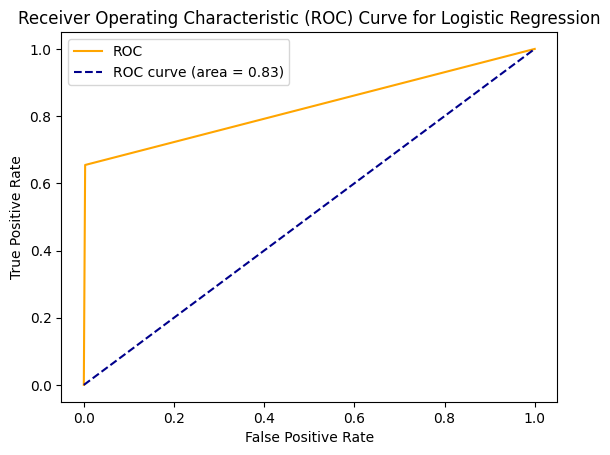

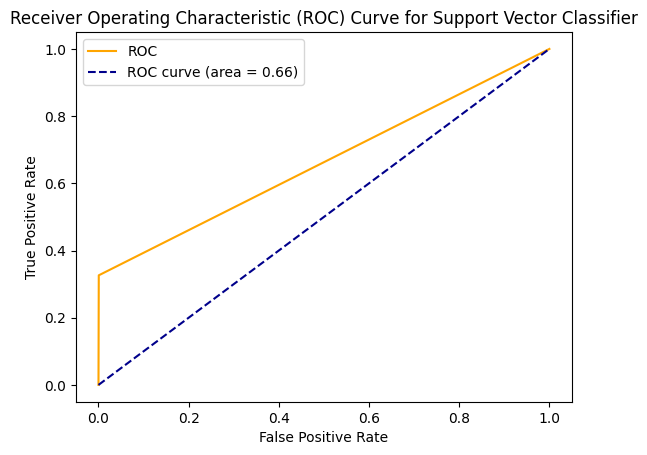

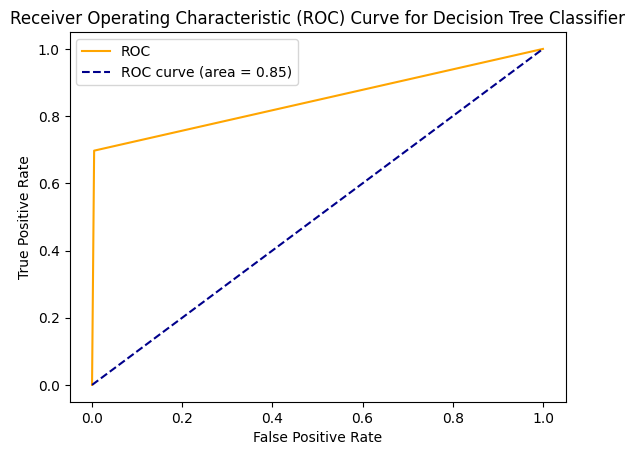

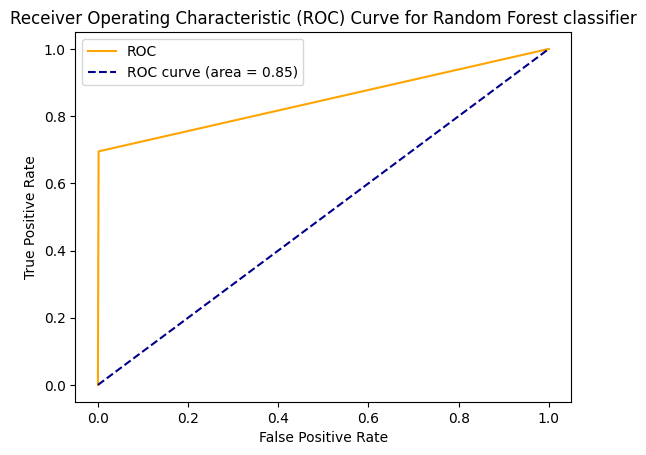

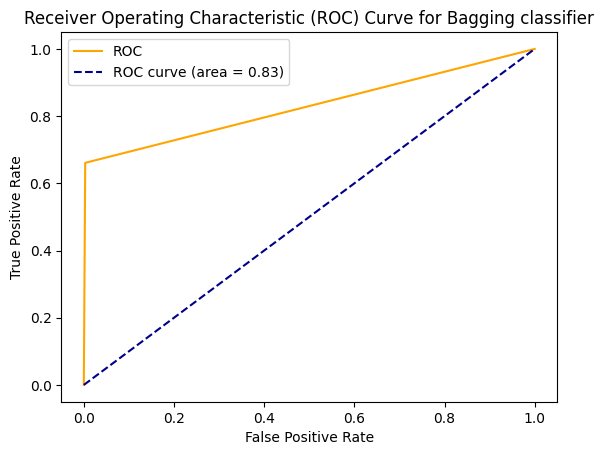

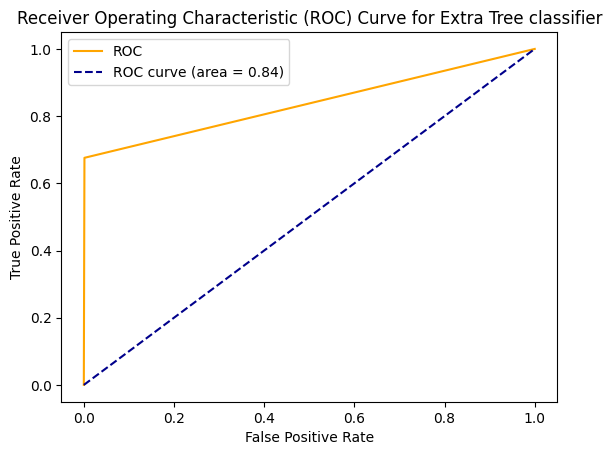

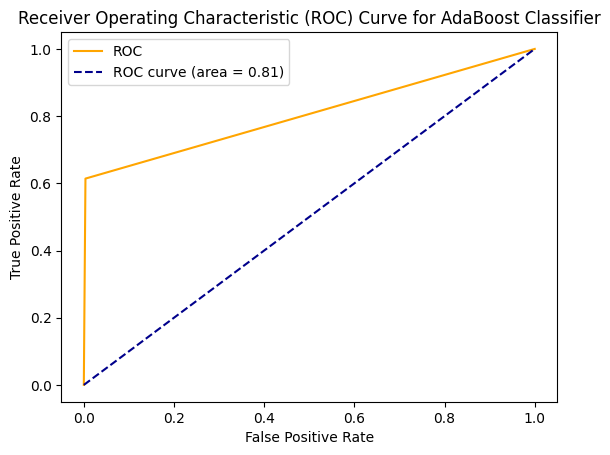

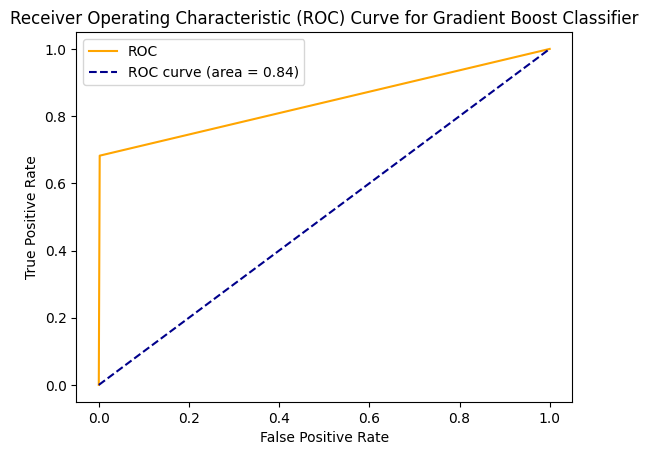

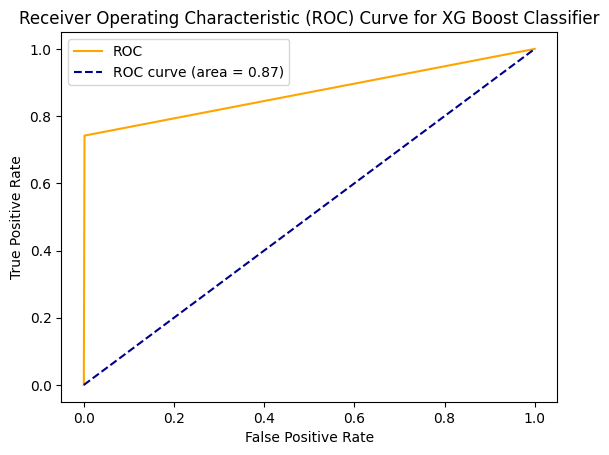

In [35]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
train_acc_score_list=[]
test_acc_score_list=[]
### creating empty list for storing precision score
train_prec_score_list=[]
test_prec_score_list=[]
### creating list to store recall score
train_recall_list=[]
test_recall_list=[]
### creating list to store roc_auc score
train_roc_auc_list=[]
test_roc_auc_list=[]


## Taining all models and getting their performance and storing in the empty list
for i in range(len(models.keys())):
    # model selection
    model = list(models.values())[i]

    ## getting train data and test data prediction
    y_train_pred, pred_val = model_trainer(model,x_train,y_train,x_test)

    ## getting model performance parameters for train data
    acc1, prec1, rec1, roc_auc1 = model_evaluator(y_train,y_train_pred)

    ## getting model performance parameters for test data
    acc, prec, rec, roc_auc = model_evaluator(y_test,pred_val)

    ## plot the ROC Curve (Receiver Operating Characteristic Curve)
    fpr, tpr, thresholds = roc_curve(y_test, pred_val)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for {}'.format(list(models.keys())[i]))
    plt.legend()
    plt.show()

    ## Append values to respective lists
    model_list.append(list(models.keys())[i])

    train_acc_score_list.append(acc1)
    test_acc_score_list.append(acc)

    train_prec_score_list.append(prec1)
    test_prec_score_list.append(prec)

    train_recall_list.append(rec1)
    test_recall_list.append(rec)
    
    train_roc_auc_list.append(roc_auc1)
    test_roc_auc_list.append(roc_auc)

In [36]:
all_models = pd.DataFrame(list(zip(model_list , train_acc_score_list , test_acc_score_list,
                                train_prec_score_list, test_prec_score_list,
                                train_recall_list, test_recall_list, train_roc_auc_list,test_roc_auc_list)),
            columns = ['Model','Train_Accuracy','Test_Accuracy',
                        'Train_Precision','Test_Precision',
                        'Train_Recall','Test_Recall',
                        'Train_Roc_Auc Score','Test_Roc_Auc Score']).sort_values(by ='Test_Accuracy',ascending= False).reset_index()
all_models.drop('index',axis = 1,inplace = True)
all_models

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Roc_Auc Score,Test_Roc_Auc Score
0,XG Boost Classifier,0.99998,0.99366,1.00000,0.90155,0.99890,0.74200,0.99945,0.87023
1,Random Forest classifier,1.00000,0.99286,1.00000,0.90055,1.00000,0.69510,1.00000,0.84682
2,Extra Tree classifier,1.00000,0.99258,1.00000,0.90313,1.00000,0.67591,1.00000,0.83726
3,Gradient Boost Classifier,0.99582,0.99211,0.94710,0.86721,0.81015,0.68230,0.90467,0.84016
4,Logistic Regression,0.99258,0.99067,0.86066,0.81003,0.69536,0.65458,0.84666,0.82583
5,Bagging classifier,0.99275,0.99063,0.86731,0.80311,0.69978,0.66098,0.84892,0.82895
6,Decision Tree Classifier,1.00000,0.98979,1.00000,0.74150,1.00000,0.69723,1.00000,0.84630
7,AdaBoost Classifier,0.99173,0.98923,0.81453,0.76393,0.69316,0.61407,0.84515,0.80523
8,Support Vector Classifier,0.99776,0.98676,0.99624,0.90533,0.87748,0.32623,0.93871,0.66279


#### Hyperparameter tunning on all parameters

In [56]:
### Hyper- Parameters for different models
## These parameter are taking very much time so we will tune using some less parameters
# rfc_params = {'n_estimators' : [90,100,115,130],
#               'criterion' : ['gini','entropy'],
#               'max_depth' : range(2,20,1),
#               'min_samples_leaf' : range(1,10,1),
#               'min_samples_split' :range(2,10,),
#               'max_features' : ['auto','log2']
# }

# dtc_param = {'criterion' : ['gini','entropy'],
#              'max_depth' : range(2,20,1),
#              'min_samples_leaf' : range(1,10,1),
#              'min_samples_split' :range(2,10,),
#              'splitter' : ['best','random']
# }

# adc_param = {"n_estimators" : [500,1000,2000],
#              "learning rate" : [0.01,0.1]
# }


# etc_params={'n_estimators':[100,200, 300],
#            'max_depth': [None, 5,10],
#            'min_samples_leaf': [5,10,15]}


# gbc_param = {'criterion': ['friedman_mse', 'squared_error', 'mse'],
#              "n_estimators" : [90,100,115,130],
#              "learning rate" : [0.001,0.01,0.1],
#              'max_depth' : range(2,20,1),
#              'min_samples_leaf' : range(1,10,1),
#              'min_samples_split' :range(2,10,),
#              'max_features' : ['auto','log2']
# }

# xgboost_param = {"max_depth" : [3,6,9],
#                  "min_child_weight" : [1,10,100],
#                  'gamma': [i/10 for i in range(4)]
# }

In [37]:
### Hyper-Parameters for different algorithms
rfc_params={'n_estimators':[100,200, 300],
           'max_depth': [None, 5,10],
           'min_samples_leaf': [5,10,15]}

dtc_param = {'criterion' : ['gini','entropy'],
             'max_depth': [None, 5,10],
             'min_samples_leaf': [5,10,15]}


etc_params={'n_estimators':[100,200, 300],
           'max_depth': [None, 5,10],
           'min_samples_leaf': [5,10,15]}

gbc_params={'criterion': ['friedman_mse', 'squared_error', 'mse'],
            'n_estimators':[100,200, 300],
            'min_samples_split': [20,30,40]}

xgbc_params={'max_depth': [2,4,6],
            'min_child_weight': [2,4,6],
            'gamma': [i/10 for i in range(4)]}

In [38]:
## Create empty dictionary to store best parameters
model_param = {}

#### Hyper-Parameter tunning for random forest Classifier

In [39]:
### HPT Random forest Classifier Model
model=RandomForestClassifier()
grid=GridSearchCV(estimator=model,param_grid=rfc_params, cv=2,  verbose=2,n_jobs=-1)
grid.fit(x_train, y_train)
model_param['Random forest Classifier']=grid.best_params_

Fitting 2 folds for each of 27 candidates, totalling 54 fits


#### Hyper-Parameter tunning for Decision Tree Classifier

In [40]:
## HPT for Decision Tree Classifier
model = DecisionTreeClassifier() 
grid = GridSearchCV(estimator=model, param_grid = dtc_param, cv = 2, verbose= 2, n_jobs=-1)
grid.fit(x_train,y_train)
model_param['Decision Tree Classifier'] = grid.best_params_

Fitting 2 folds for each of 18 candidates, totalling 36 fits


#### Hyper-Parameter tunning for Extra Tree classifier

In [42]:
## HPT on Extratrees Classifier 
model = ExtraTreesClassifier()
grid = GridSearchCV(estimator=model, param_grid= etc_params, cv= 2, verbose=2, n_jobs= -1)
grid.fit(x_train,y_train)
model_param['Extra Trees Classifier'] = grid.best_params_

Fitting 2 folds for each of 27 candidates, totalling 54 fits


#### Hyper-Parameter tunning for Gradient Boost Classifier

In [43]:
## HPT on Gradiant Boost classifier
model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model , param_grid= gbc_params, cv = 2, verbose = 2, n_jobs = -1)
grid.fit(x_train,y_train)
model_param['Gradiant Boost classifier'] = grid.best_params_

Fitting 2 folds for each of 27 candidates, totalling 54 fits


#### Hyper-Parameter tunning for XG Boost Classifier

In [45]:
### HPT XB Boost Classifier Model
model=XGBClassifier()
grid=GridSearchCV(estimator=model,param_grid=xgbc_params, cv=2,  verbose=2,n_jobs=-1)
grid.fit(x_train, y_train)
model_param['XBBoost Classifier']=grid.best_params_

Fitting 2 folds for each of 36 candidates, totalling 72 fits


In [46]:
model_param

{'Random forest Classifier': {'max_depth': None,
  'min_samples_leaf': 5,
  'n_estimators': 200},
 'Decision Tree Classifier': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 10},
 'Extra Trees Classifier': {'max_depth': None,
  'min_samples_leaf': 5,
  'n_estimators': 300},
 'Gradiant Boost classifier': {'criterion': 'friedman_mse',
  'min_samples_split': 40,
  'n_estimators': 300},
 'XBBoost Classifier': {'gamma': 0.2, 'max_depth': 6, 'min_child_weight': 6}}

#### Best Parameter for Hyper-Tuned models

In [58]:
for i in model_param:
    print("Best parameter for {} is {}".format(i,model_param[i]))

Best parameter for Random forest Classifier is {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 200}
Best parameter for Decision Tree Classifier is {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
Best parameter for Extra Trees Classifier is {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 300}
Best parameter for Gradiant Boost classifier is {'criterion': 'friedman_mse', 'min_samples_split': 40, 'n_estimators': 300}
Best parameter for XBBoost Classifier is {'gamma': 0.2, 'max_depth': 6, 'min_child_weight': 6}


#### Re-training Models with Best Hyper_parameters and Model evaluation

In [62]:
hyp_models = { "Random Forest Classifier" : RandomForestClassifier(max_depth = None, min_samples_leaf = 5, n_estimators = 200),
           "Decision Tree Classifier" : DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 10),
           "Extra Trees Classifier" : ExtraTreesClassifier(max_depth= None, min_samples_leaf =  5, n_estimators = 300),
           "Gradiant Boost classifier" : GradientBoostingClassifier(criterion = 'friedman_mse', min_samples_split = 40, n_estimators = 300),
           "XGBoost Classifier" : XGBClassifier(gamma = 0.2, max_depth = 6, min_child_weight = 6 )           
}

In [63]:
### Creating empty list to store model names
model_list2=[]
### creating empty list to store accuracy score for each model
train_acc_score_list2=[]
test_acc_score_list2=[]
### creating empty list for storing precision score
train_prec_score_list2=[]
test_prec_score_list2=[]
### creating list to store recall score
train_recall_list2=[]
test_recall_list2=[]
### creating list to store roc_auc score
train_roc_auc_list2=[]
test_roc_auc_list2=[]


## Taining all models and getting their performance and storing in the empty list
for i in range(len(hyp_models.keys())):
    # model selection
    hyp_model = list(hyp_models.values())[i]

    ## getting train data and test data prediction
    y_train_pred, pred_val = model_trainer(hyp_model,x_train,y_train,x_test)

    ## getting model performance parameters for train data
    acc1, prec1, rec1, roc_auc1 = model_evaluator(y_train,y_train_pred)

    ## getting model performance parameters for test data
    acc, prec, rec, roc_auc = model_evaluator(y_test,pred_val)

    ## Append values to respective lists
    model_list2.append(list(models.keys())[i])

    train_acc_score_list2.append(acc1)
    test_acc_score_list2.append(acc)

    train_prec_score_list2.append(prec1)
    test_prec_score_list2.append(prec)

    train_recall_list2.append(rec1)
    test_recall_list2.append(rec)
    
    train_roc_auc_list2.append(roc_auc1)
    test_roc_auc_list2.append(roc_auc)

In [64]:
all_models_hyp = pd.DataFrame(list(zip(model_list2 , train_acc_score_list2 , test_acc_score_list2,
                                train_prec_score_list2, test_prec_score_list2,
                                train_recall_list2, test_recall_list2, train_roc_auc_list2,test_roc_auc_list2)),
            columns = ['Model','Train_Accuracy','Test_Accuracy',
                        'Train_Precision','Test_Precision',
                        'Train_Recall','Test_Recall',
                        'Train_Roc_Auc Score','Test_Roc_Auc Score']).sort_values(by ='Test_Accuracy',ascending= False).reset_index()
all_models_hyp.drop('index',axis = 1,inplace = True)
all_models_hyp

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Roc_Auc Score,Test_Roc_Auc Score
0,XGBoost Classifier,0.99988,0.99350,1.00000,0.90476,0.99338,0.72921,0.99669,0.86387
1,Gradiant Boost classifier,0.99837,0.99215,0.98469,0.84171,0.92274,0.71429,0.96124,0.85586
2,Random Forest Classifier,0.99739,0.99191,0.99236,0.88439,0.85982,0.65245,0.92985,0.82541
3,Extra Trees Classifier,0.99645,0.99107,0.98527,0.88401,0.81236,0.60128,0.90607,0.79989
4,Decision Tree Classifier,0.99446,0.98983,0.89594,0.78010,0.77925,0.63539,0.88880,0.81599


In [65]:
all_models

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Roc_Auc Score,Test_Roc_Auc Score
0,XG Boost Classifier,0.99998,0.99366,1.00000,0.90155,0.99890,0.74200,0.99945,0.87023
1,Random Forest classifier,1.00000,0.99286,1.00000,0.90055,1.00000,0.69510,1.00000,0.84682
2,Extra Tree classifier,1.00000,0.99258,1.00000,0.90313,1.00000,0.67591,1.00000,0.83726
3,Gradient Boost Classifier,0.99582,0.99211,0.94710,0.86721,0.81015,0.68230,0.90467,0.84016
4,Logistic Regression,0.99258,0.99067,0.86066,0.81003,0.69536,0.65458,0.84666,0.82583
5,Bagging classifier,0.99275,0.99063,0.86731,0.80311,0.69978,0.66098,0.84892,0.82895
6,Decision Tree Classifier,1.00000,0.98979,1.00000,0.74150,1.00000,0.69723,1.00000,0.84630
7,AdaBoost Classifier,0.99173,0.98923,0.81453,0.76393,0.69316,0.61407,0.84515,0.80523
8,Support Vector Classifier,0.99776,0.98676,0.99624,0.90533,0.87748,0.32623,0.93871,0.66279
